(512, 640) uint8


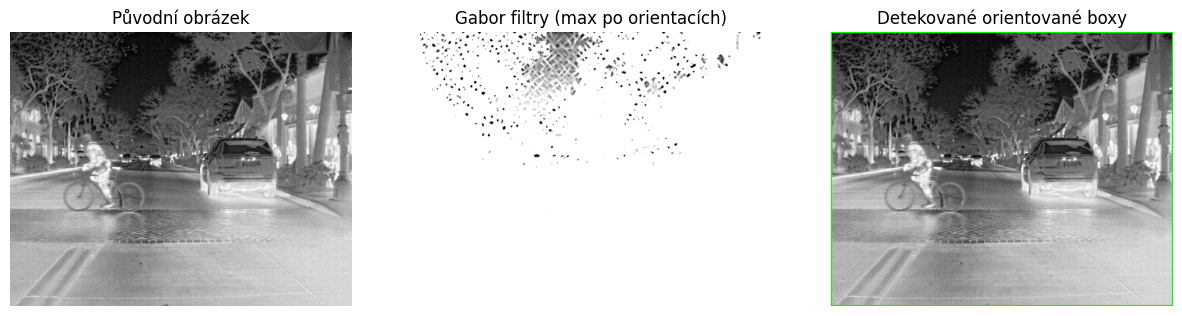

In [2]:
from gabors_filter_processing import GaborFilterProcess

process = GaborFilterProcess(
    ksize=16, sigma=4.0, lambd=10.0, gamma=0.8, psi=0, thetas=None
)

process("img.png")

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


class ThermalObjectDetector:
    def __init__(self, threshold=120, min_area=100):
        """
        threshold: práh intenzity pro detekci teplých oblastí (0–255)
        min_area: minimální plocha objektu pro zachování
        """
        self.threshold = threshold
        self.min_area = min_area

    def __call__(self, img_path):
        # Načti obraz ve stupních šedi
        gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if gray is None:
            raise ValueError("Obrázek se nepodařilo načíst.")

        # Prahování - binarizace teplých oblastí
        _, binary = cv2.threshold(gray, self.threshold, 255, cv2.THRESH_BINARY)

        # Morfologie - odstranění šumu, vyplnění děr
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

        # Najdi kontury
        contours, _ = cv2.findContours(
            binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )

        # Nakresli bounding boxy
        output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        for cnt in contours:
            if cv2.contourArea(cnt) > self.min_area:
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Zobraz výsledek
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Původní obrázek")
        plt.imshow(gray, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Binarizace teplých oblastí")
        plt.imshow(binary, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.title("Detekované objekty")
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.axis("off")

        plt.tight_layout()
        plt.show()

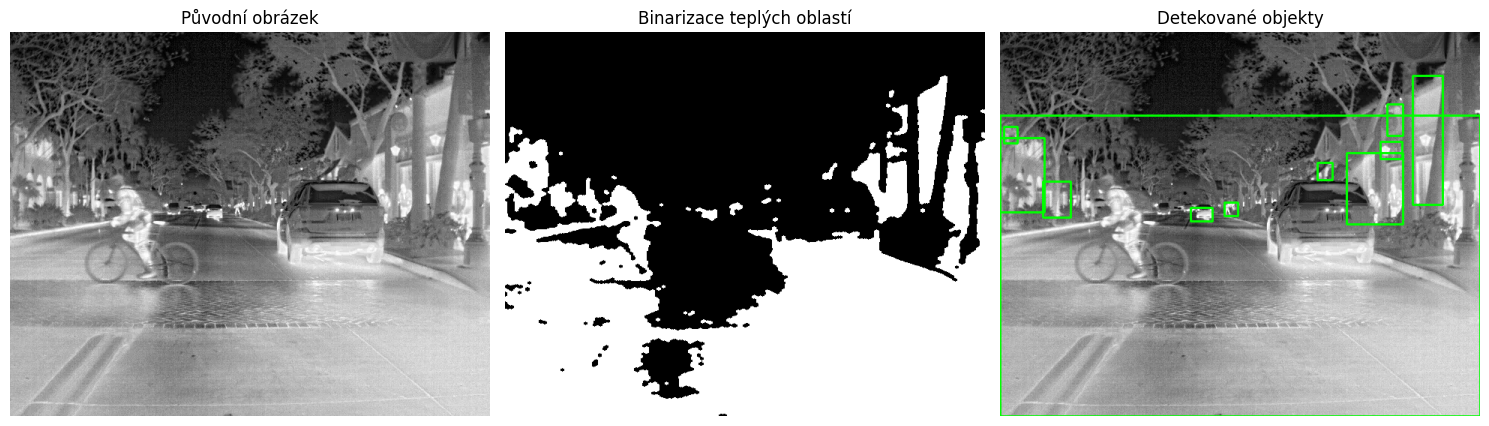

In [8]:
process = ThermalObjectDetector(threshold=150, min_area=100)

process("img.png")